In [136]:
from dataset import get_loader
from tqdm import tqdm
import torch
import numpy as np
system = 'sst_envs'
model = 'acrobot_obs'
batch = 2
# setup = 'default'
setup = "norm_nodiff_noaug_20step2e-2"


In [137]:
%cd /media/arclabdl1/HD1/Linjun/mpc-mpnet/mpnet
train_loader, test_loader = get_loader(system, model, batch_size=batch, setup=setup)

/media/arclabdl1/HD1/Linjun/mpc-mpnet/mpnet


In [138]:
train_loader

In [139]:
for data, label in tqdm(train_loader):
    print(data, label)
    break

  0%|          | 0/85238 [00:00<?, ?it/s]

tensor([[ 6.0000,  0.4164,  0.6400,  0.3150, -0.4330, -0.7304, -0.5221,
          0.0000,  0.0000],
        [ 1.0000,  0.0548, -0.7507, -0.4917,  0.0879, -0.7495, -0.6065,
          0.0000,  0.0000]]) tensor([[ 0.3673,  0.6262, -0.4770,  0.4089],
        [-0.0892, -0.7209, -0.4216,  0.0869]])


In [140]:
data[0, 1:],label[0]

(tensor([ 0.4164,  0.6400,  0.3150, -0.4330, -0.7304, -0.5221,  0.0000,
          0.0000]), tensor([ 0.3673,  0.6262, -0.4770,  0.4089]))

In [141]:
data[1, 1:],label[1]

(tensor([ 0.0548, -0.7507, -0.4917,  0.0879, -0.7495, -0.6065,  0.0000,
          0.0000]), tensor([-0.0892, -0.7209, -0.4216,  0.0869]))

## distributions

In [142]:
inputs, gts = train_loader.dataset.tensors
inputs = inputs[:, 1:]
diff = gts - inputs[:, 4:] 
# diff[diff[:,0] < -np.pi] += 2*np.pi
# diff[diff[:,0] > np.pi] -= 2*np.pi
# diff[diff[:,1] < -np.pi] += 2*np.pi
# diff[diff[:,1] > np.pi] -= 2*np.pi

<IPython.core.display.Javascript object>


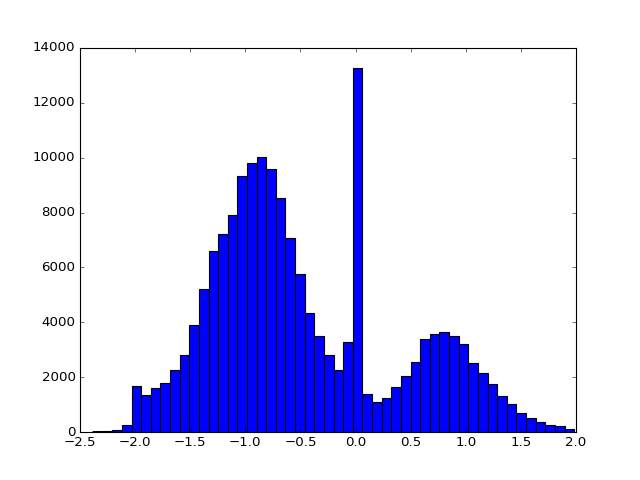

(array([   17.,    50.,    81.,   247.,  1660.,  1364.,  1621.,  1777.,
         2243.,  2799.,  3895.,  5201.,  6616.,  7223.,  7905.,  9341.,
         9820., 10029.,  9574.,  8539.,  7090.,  5762.,  4349.,  3498.,
         2816.,  2253.,  3288., 13272.,  1403.,  1090.,  1228.,  1643.,
         2036.,  2561.,  3380.,  3589.,  3655.,  3496.,  3192.,  2505.,
         2153.,  1742.,  1313.,  1017.,   692.,   495.,   380.,   250.,
          232.,    94.]),
 array([-2.381768  , -2.294461  , -2.2071538 , -2.1198468 , -2.0325396 ,
        -1.9452325 , -1.8579254 , -1.7706183 , -1.6833112 , -1.5960041 ,
        -1.508697  , -1.4213899 , -1.3340828 , -1.2467757 , -1.1594687 ,
        -1.0721616 , -0.9848545 , -0.8975474 , -0.8102403 , -0.72293323,
        -0.63562614, -0.54831904, -0.46101195, -0.37370485, -0.28639776,
        -0.19909066, -0.11178356, -0.02447647,  0.06283062,  0.15013771,
         0.2374448 ,  0.3247519 ,  0.41205898,  0.49936607,  0.5866732 ,
         0.6739803 ,  0.7612874

In [148]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(diff[:, 0], bins=50)

tensor(930)


<IPython.core.display.Javascript object>


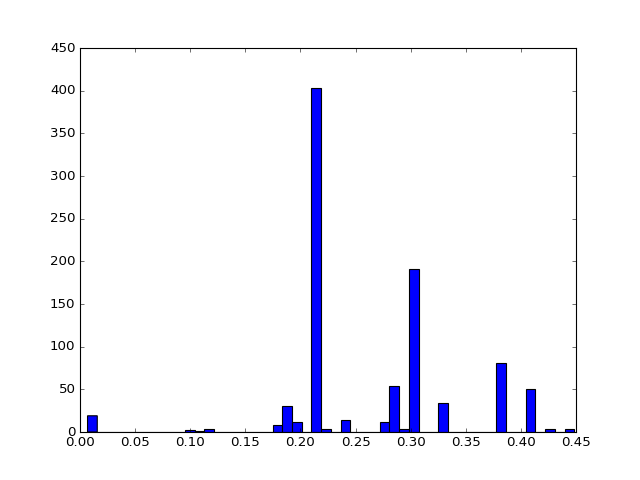

(array([ 19.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,  31.,  12.,
          0., 403.,   4.,   0.,  14.,   0.,   0.,   0.,  12.,  54.,   3.,
        191.,   0.,   0.,  34.,   0.,   0.,   0.,   0.,   0.,  81.,   0.,
          0.,  50.,   0.,   4.,   0.,   4.]),
 array([0.00683341, 0.01566758, 0.02450175, 0.03333593, 0.0421701 ,
        0.05100428, 0.05983845, 0.06867263, 0.0775068 , 0.08634097,
        0.09517515, 0.10400932, 0.1128435 , 0.12167767, 0.13051185,
        0.13934602, 0.14818019, 0.15701437, 0.16584854, 0.17468272,
        0.18351689, 0.19235106, 0.20118524, 0.21001941, 0.2188536 ,
        0.22768776, 0.23652193, 0.24535611, 0.2541903 , 0.26302445,
        0.27185863, 0.28069282, 0.28952697, 0.29836115, 0.30719534,
        0.31602952, 0.32486367, 0.33369786, 0.34253204, 0.3513662 ,
        0.36020038, 0.36903456, 0.3778687 , 0.3867029 , 0.39553708,
        0.40437126, 0.41320542, 0.4220396 , 0.

In [159]:
%matplotlib notebook
nn_mask = torch.norm(inputs - inputs[22], 2, dim=1) < 0.2
print(nn_mask.sum())
dim = 1
plt.hist(gts[nn_mask, dim], bins=50)
# plt.hist(diff[nn_mask, dim], bins=50)

<IPython.core.display.Javascript object>


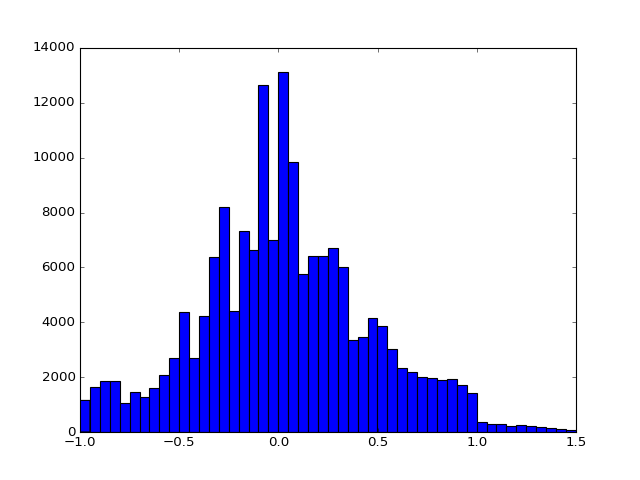

(array([ 1151.,  1636.,  1851.,  1856.,  1041.,  1445.,  1287.,  1599.,
         2082.,  2702.,  4379.,  2704.,  4244.,  6397.,  8219.,  4413.,
         7330.,  6621., 12649.,  7011., 13133.,  9859.,  5761.,  6407.,
         6431.,  6725.,  6006.,  3368.,  3478.,  4156.,  3869.,  3028.,
         2332.,  2195.,  1989.,  1953.,  1903.,  1946.,  1726.,  1424.,
          348.,   307.,   288.,   230.,   238.,   230.,   183.,   163.,
          116.,    67.]),
 array([-9.9993527e-01, -9.4996023e-01, -8.9998519e-01, -8.5001016e-01,
        -8.0003512e-01, -7.5006008e-01, -7.0008504e-01, -6.5010995e-01,
        -6.0013491e-01, -5.5015987e-01, -5.0018483e-01, -4.5020980e-01,
        -4.0023476e-01, -3.5025972e-01, -3.0028468e-01, -2.5030965e-01,
        -2.0033459e-01, -1.5035956e-01, -1.0038450e-01, -5.0409466e-02,
        -4.3442249e-04,  4.9540620e-02,  9.9515662e-02,  1.4949070e-01,
         1.9946575e-01,  2.4944079e-01,  2.9941583e-01,  3.4939086e-01,
         3.9936590e-01,  4.4934097e-01

In [153]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(gts[:, 0], bins=50)

## Voxels

In [29]:
env_vox = torch.from_numpy(np.load('{}/{}_env_vox.npy'.format(system, model))).float()[:, 0, :, :]
env_vox.shape

torch.Size([10, 32, 32])

<IPython.core.display.Javascript object>


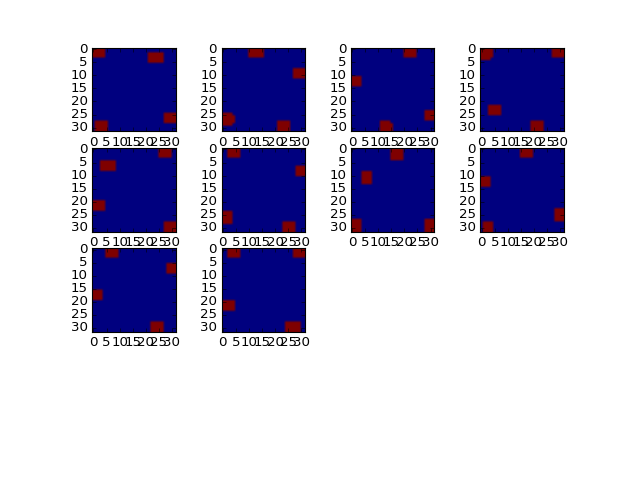

In [37]:
%matplotlib notebook
from matplotlib import pyplot as plt

for i in range(env_vox.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(env_vox[i])

In [34]:
plt.imshow(env_vox[0])